In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Temp_Forecast.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.shape

(7752, 25)

In [4]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# Summary Statistics

In [7]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


Observations :-
    
1. Mean is more than median for LDAPS_RHmin, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM and Slope.
2. There is large difference between 75% and maximum for LDAPS_LH, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 and DEM.


# Exploring Target Variable

In [8]:
df['Next_Tmax'].value_counts()

29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.3      1
37.6      1
19.7      1
21.5      1
38.7      1
Name: Next_Tmax, Length: 183, dtype: int64

In [9]:
df['Next_Tmin'].value_counts()

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
29.5      1
13.6      1
13.3      1
13.9      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64

In [10]:
# As we have continuos values in both columns, so, this is a regression problem.

# Univariate Analysis

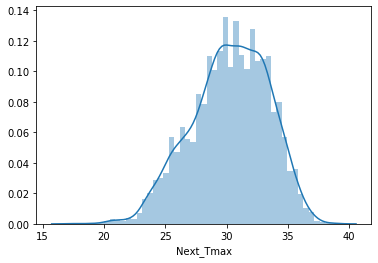

In [11]:
sns.distplot(df['Next_Tmax'])

Observations :-
    
1. The next-day maximum air temperature (Â°C) is majorly in the range of 27.5 Â°C - 32.5 Â°C.

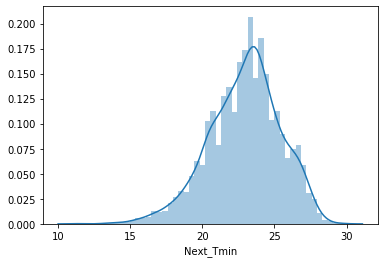

In [12]:
sns.distplot(df['Next_Tmin'])

Observations :-
    
1. The next-day minimum air temperature (Â°C) is majorly in the range of 21.0 Â°C - 25.0 Â°C.

# Data Visualizations

To check missing values

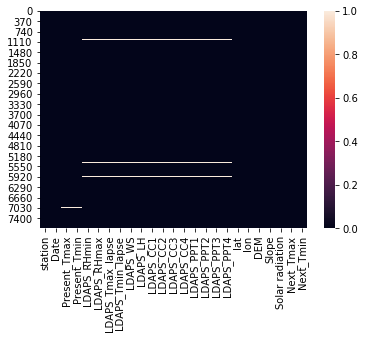

In [13]:
sns.heatmap(df.isnull())

Observations :-
    
1. Null values are present in all columns except lat,lon,DEM, Slope and Solar Radiation

In [14]:
df_null_float=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','Next_Tmax', 'Next_Tmin']

In [15]:
for i in df_null_float:
    if df[i].mean()>df[i].median():
        df[i]=df[i].fillna(df[i].mean())
    else:
        df[i]=df[i].fillna(df[i].median())
        

In [16]:
df['Date'].mode()[0]

'01-07-2013'

In [17]:
df['Date']=df['Date'].fillna(df['Date'].mode()[0])

In [18]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

# Feature Engineering

In [19]:
df['day']=df['Date'].str.split('-').str[0]
df['month']=df['Date'].str.split('-').str[1]
df['year']=df['Date'].str.split('-').str[2]

In [20]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,06,2013
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,06,2013
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,06,2013
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,06,2013
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,06,2013


# Dropping of Columns

In [21]:
df.drop('Date',axis=1,inplace=True)

In [22]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,06,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,06,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,06,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,06,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,06,2013


# Bivariate Analysis

In [23]:
df['station'].value_counts()

13.0    312
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
25.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

In [24]:
df_int_types=[]
for i in df.columns:
    if df[i].dtypes == "float64":
        df_int_types.append(i)
        
df_int_types

['station',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

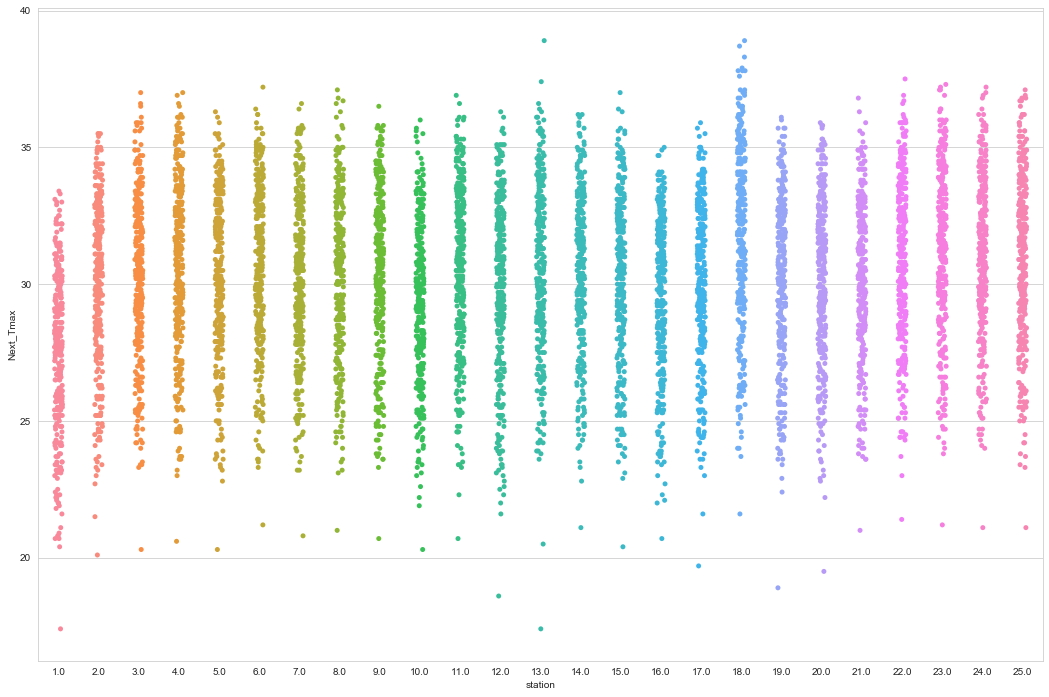

In [25]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='station',y='Next_Tmax',data=df)

Observations :-
    
1. The next-day maximum air temperature is highest for station number 13th and 18th.
2. The next-day maximum air temperature is lowest for station number 1st.
3. The next-day maximum air temperatures are lower than 20 Â°C for 1st, 12th, 13th, 17th, 19th and 20th station numbers.

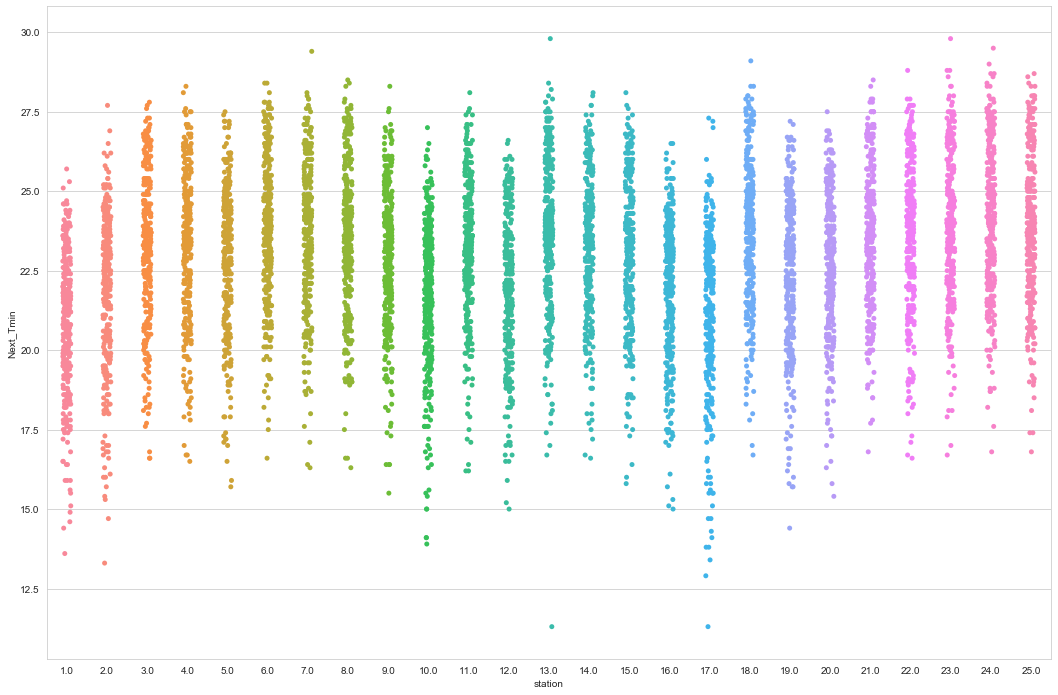

In [26]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='station',y='Next_Tmin',data=df)

Observations :-
    
1. The next-day minimum air temperature is highest for station number 13 and 23.
2. The next-day minimum air temperature is lowest for station number 1.
3. The next-day minimum air temperatures are lower than 15 Â°C for 1st, 2nd, 10th, 13th, 17th and 19th station numbers.

In [27]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'day', 'month', 'year'],
      dtype='object')

In [28]:
columns=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'day', 'month', 'year']

for i in columns:
    print(df[i].value_counts())

13.0    312
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
25.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64
29.9    166
31.4    112
29.4    111
29.1    108
29.7    107
       ... 
36.4      1
20.7      1
20.4      1
20.3      1
21.2      1
Name: Present_Tmax, Length: 167, dtype: int64
23.4    206
24.0    161
23.8    153
23.1    144
23.5    143
       ... 
13.5      1
15.0      1
13.6      1
14.2      1
29.6      1
Name: Present_Tmin, Length: 155, dtype: int64
56.759372    75
98.524734     2
19.794666     2
51.810596     2
77.030350     2
             ..
44.005089     1
58.655628     1
58.761993     1
42.186558     1
71.359451     1
Name: LDAPS_RHmin, Length: 7673, dtype: int64
89.793480    76
58.936283     2
96.525200     2
91.776146     2
88.876610     2
             .

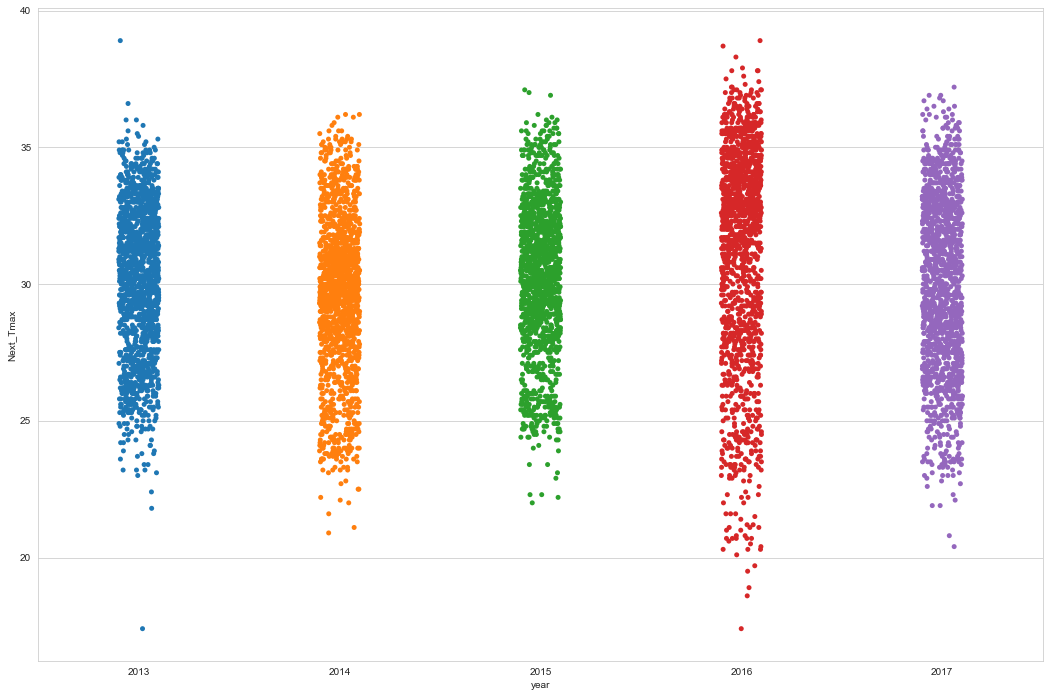

In [29]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='year',y='Next_Tmax',data=df)
plt.show()

Observations :-
    
1. The next-day maximum air temperature is highest in the year 2013.
2. The next-day maximum air temperature is lowest in the year 2014.
3. The next-day maximum air temperatures are also high in the year 2016.

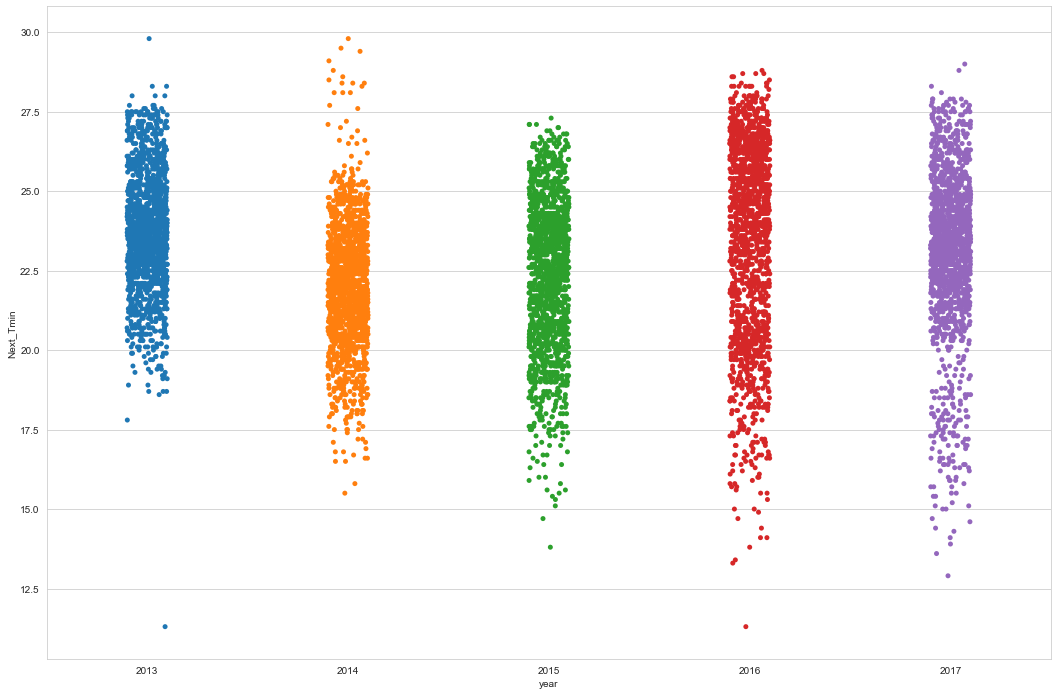

In [30]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='year',y='Next_Tmin',data=df)

Observations :-
    
1. The next-day minimum air temperature is highest in the year 2013 and 2014.
2. The next-day minimum air temperature is lowest in the year 2015.

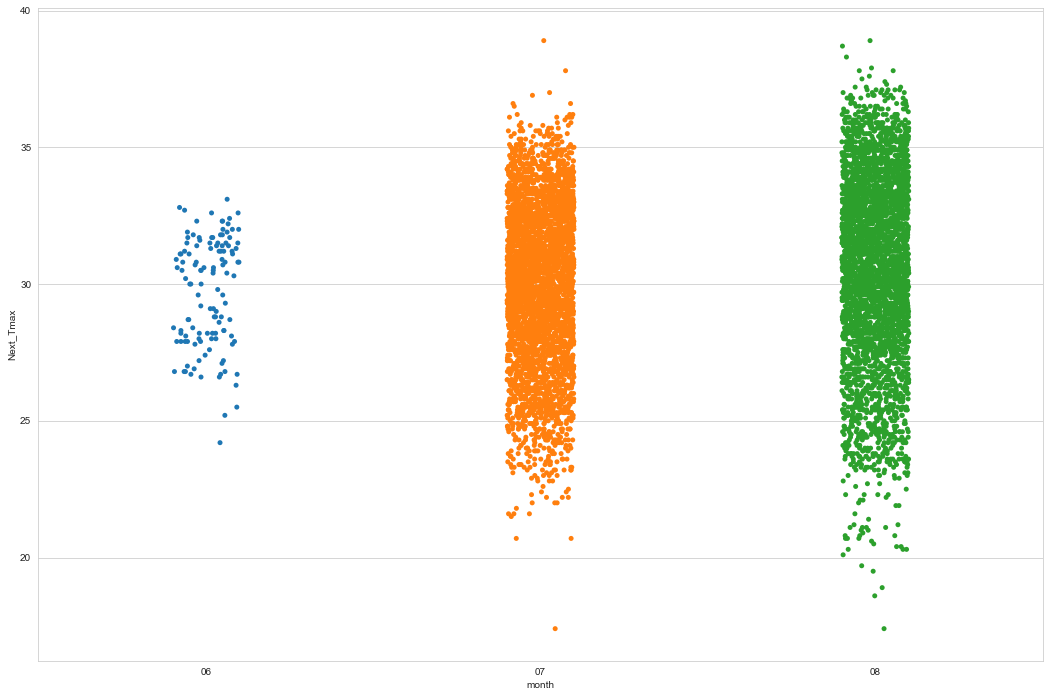

In [31]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='month',y='Next_Tmax',data=df)

Observations :-
    
1. The next-day maximum air temperature is highest in the month of July and August.
2. The next-day maximum air temperature is lowest in the month of June.

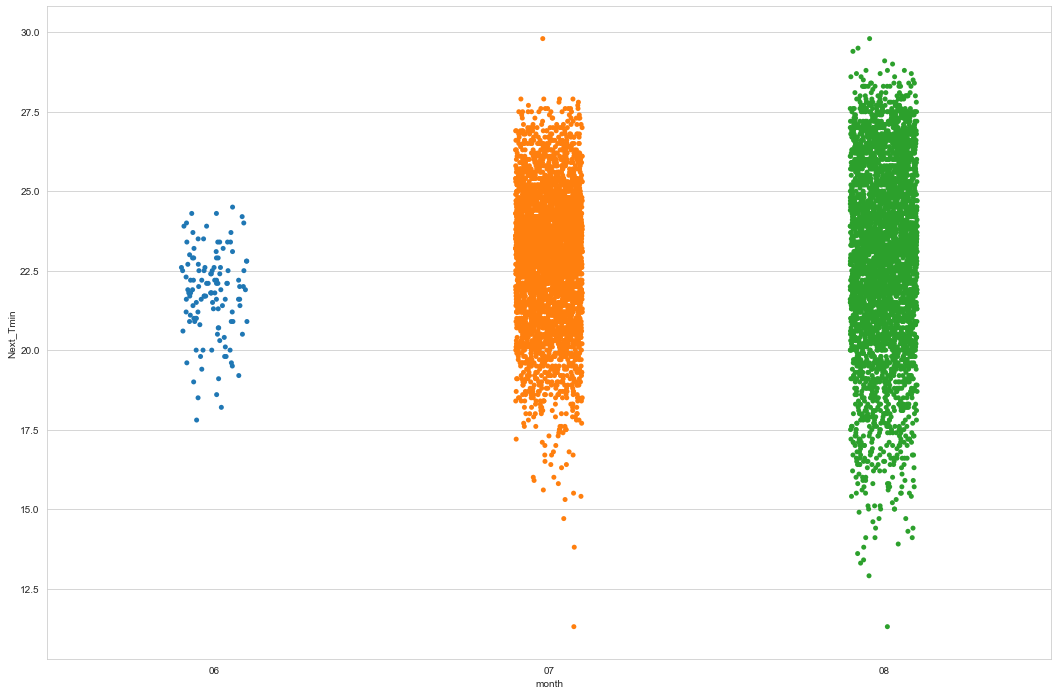

In [32]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='month',y='Next_Tmin',data=df)

Observations :-
    
1. The next-day minimum air temperature is highest in the month of July and August.
2. The next-day minimum air temperature is lowest in the month of June.

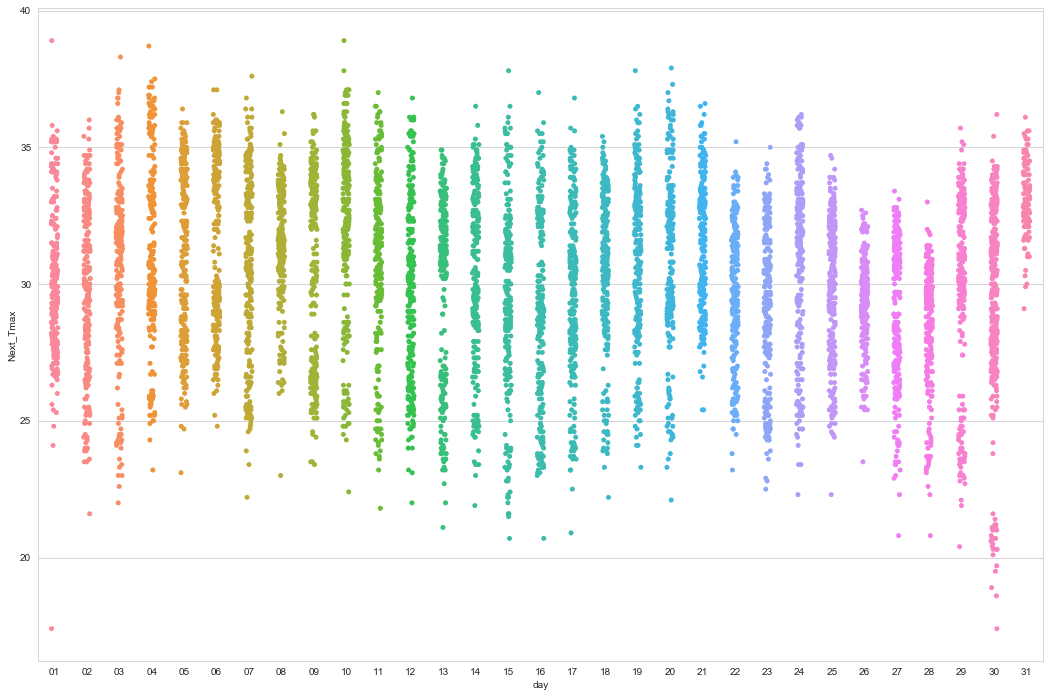

In [33]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='day',y='Next_Tmax',data=df)

Observations :-
    
1. The next-day maximum air temperature is highest on the first day of every month.
2. The next-day maximum air temperature is lowest on the 26th day of every month.
3. The next-day maximum air temperatures are also high on the 3rd, 4th, 7th , 15th, 19th and 20th days of every month.

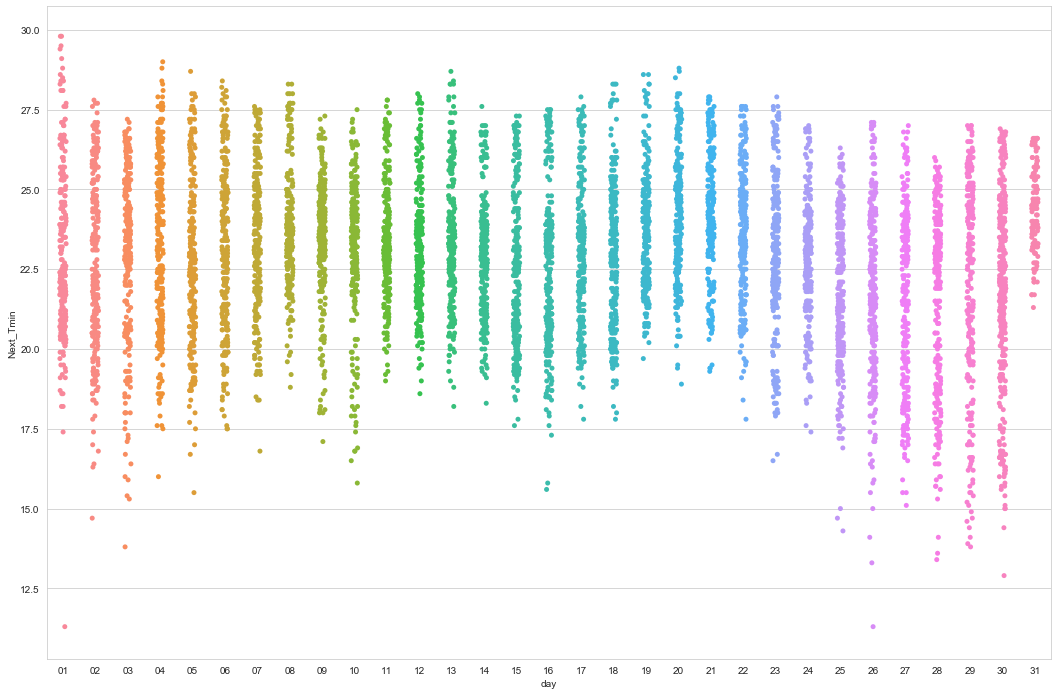

In [34]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='day',y='Next_Tmin',data=df)

Observations :-
    
1. The next-day minimum air temperature is highest on the first day of every month.
2. The next-day minimum air temperature is lowest on the 25th day of every month.
3. The next-day minimum air temperatures are also high on the 4th, 5th, 13th and 20th days of every month.

In [35]:
df['DEM']=df['DEM'].round(2)

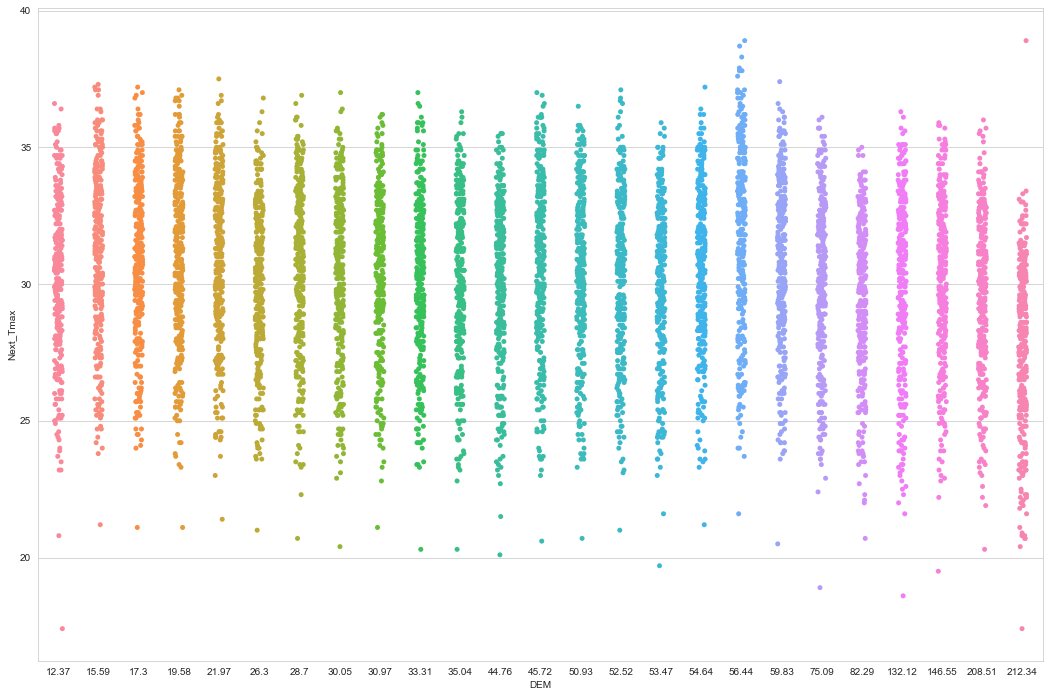

In [36]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='DEM',y='Next_Tmax',data=df)

Observations :-
    
1. The next-day maximum air temperature is highest on 56.44 elevation.
2. The next-day maximum air temperature is lowest on 82.29 elevation.
3. The next-day maximum air temperatures are also high on 212.34, 56.64 and 59.83 elevations.

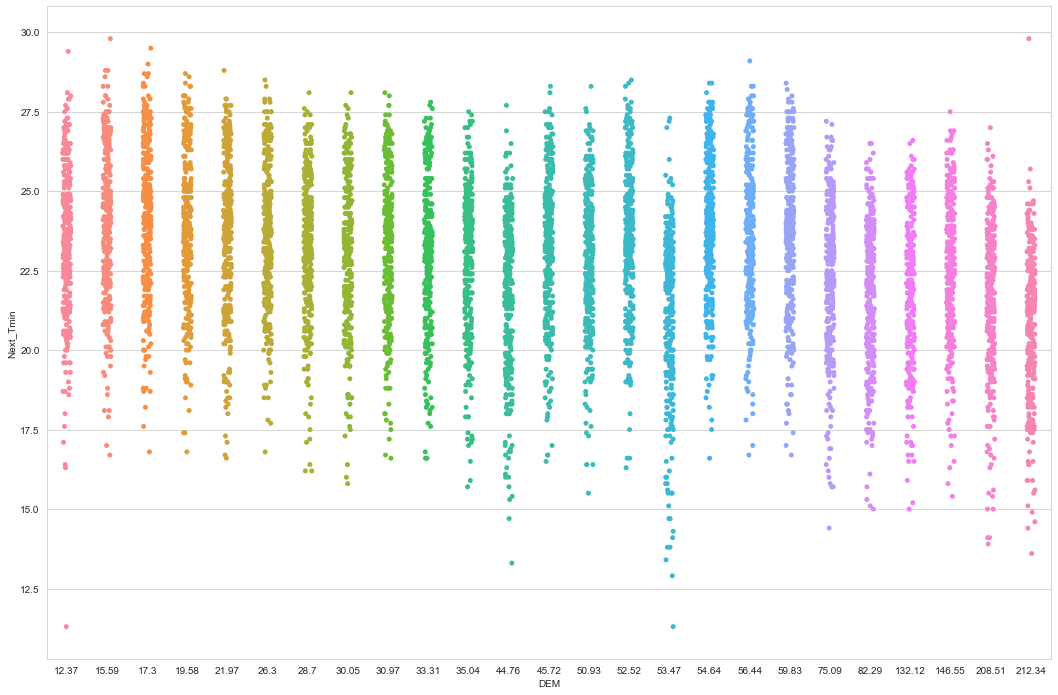

In [37]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='DEM',y='Next_Tmin',data=df)

Observations :-
    
1. The next-day minimum air temperature is highest on 15.59 and 212.34 elevation.
2. The next-day minimum air temperature is lowest on 82.29 and 132.12 elevation.
3. The next-day minimum air temperatures are also high on 12.37, 17.3, 19.58, 21.97 and 56.44 elevations.

In [38]:
df['Slope']=df['Slope'].round(2)

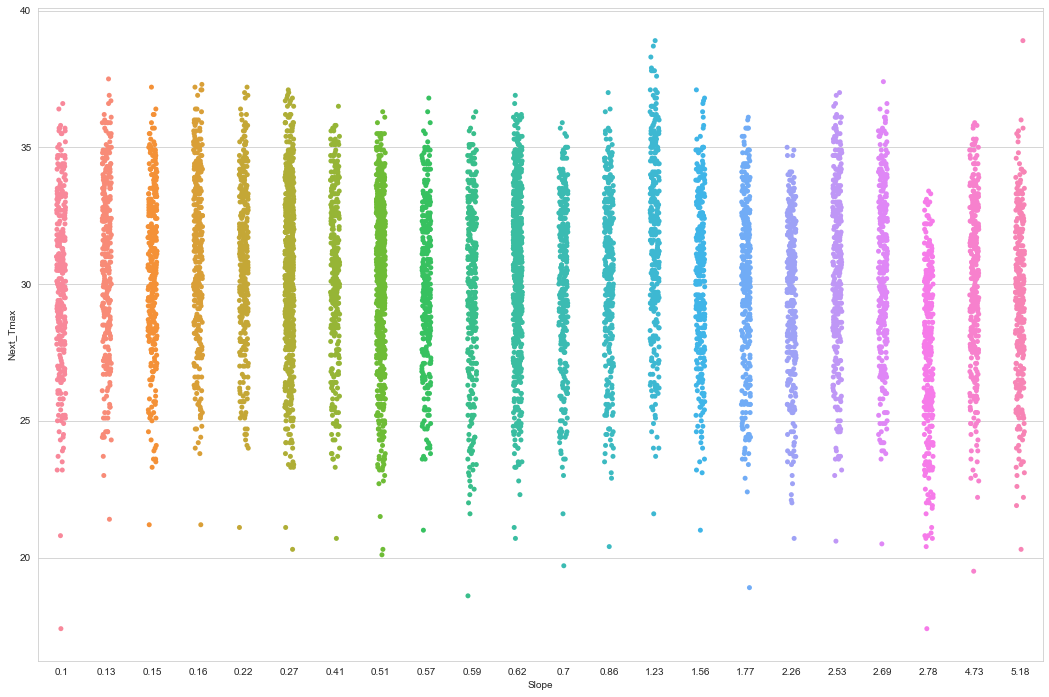

In [39]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='Slope',y='Next_Tmax',data=df)

Observations :-
    
1. The next-day maximum air temperature is highest for 1.23 Â° slope.
2. The next-day maximum air temperature is lowest for 2.78 Â° slope.
3. The next-day maximum air temperatures are also high for 5.18 Â° and 0.13 Â° slopes.

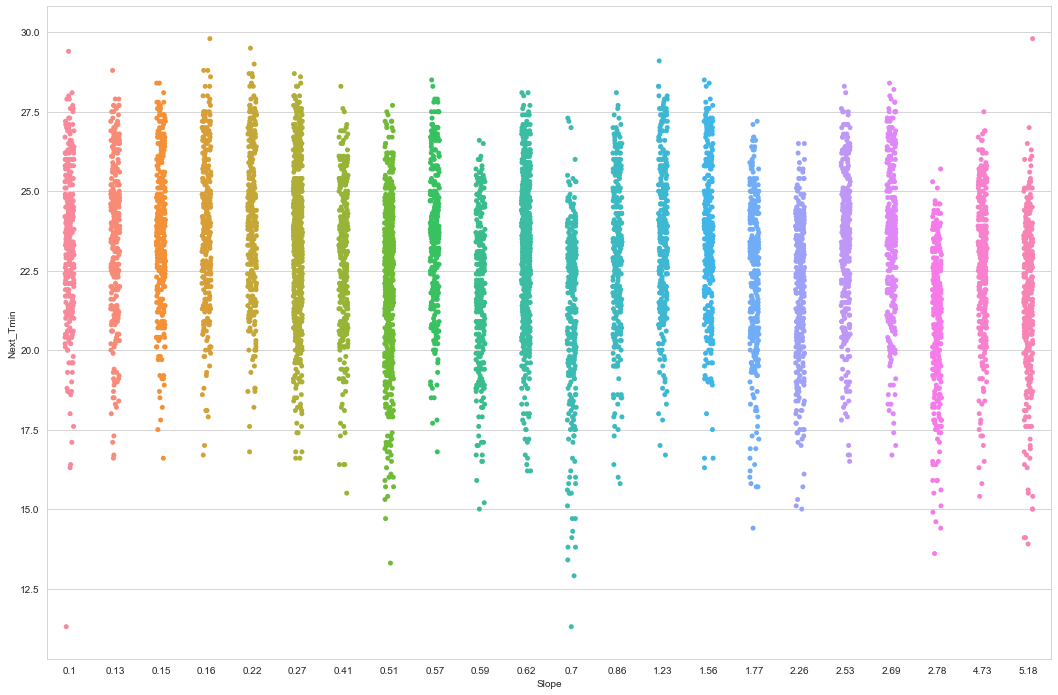

In [40]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='Slope',y='Next_Tmin',data=df)

Observations :-
    
1. The next-day minimum air temperature is highest for 0.16 Â° and 5.18 Â° slopes.
2. The next-day minimum air temperature is lowest for 2.78 Â° slope.
3. The next-day minimum air temperatures are also high for 0.1 Â°, 0.22 Â°, 1.23 and 1.56 Â° slopes.

In [41]:
df['lon']=df['lon'].round(2)

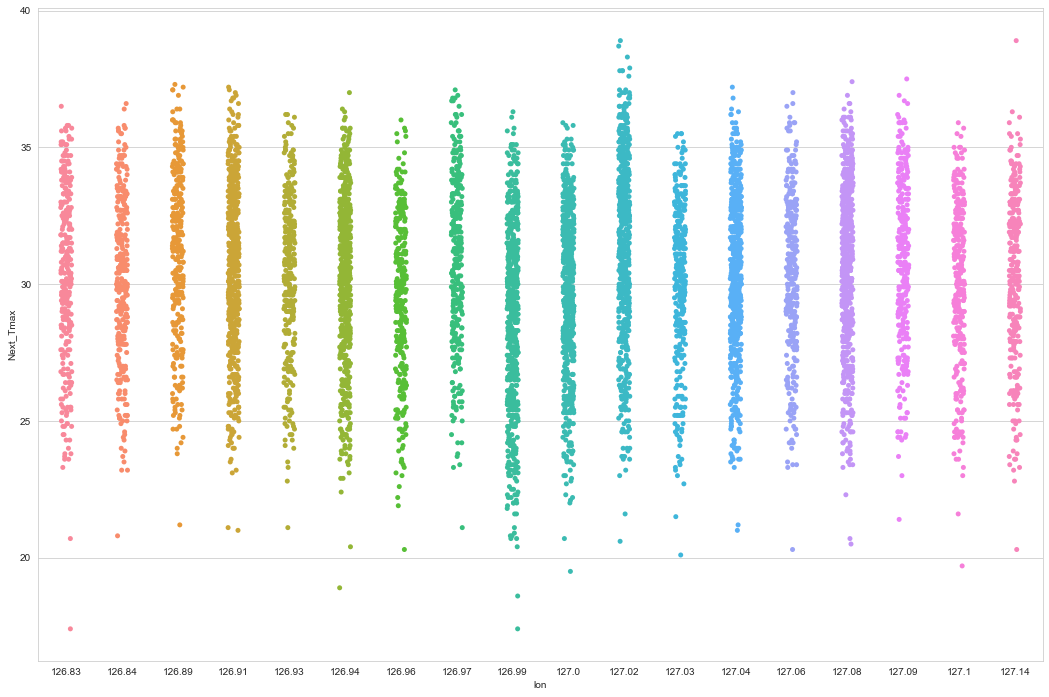

In [42]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='lon',y='Next_Tmax',data=df)

Observations :-
    
1. The next-day maximum air temperature is highest for 127.02 Â° and 127.14 Â° longitudes.
2. The next-day maximum air temperature is lowest for 127.03 Â° longitudes.
3. The next-day maximum air temperatures are also high for 126.89 Â°, 126.91  Â°, 127.08  Â° and 127.09 Â° longitudes.

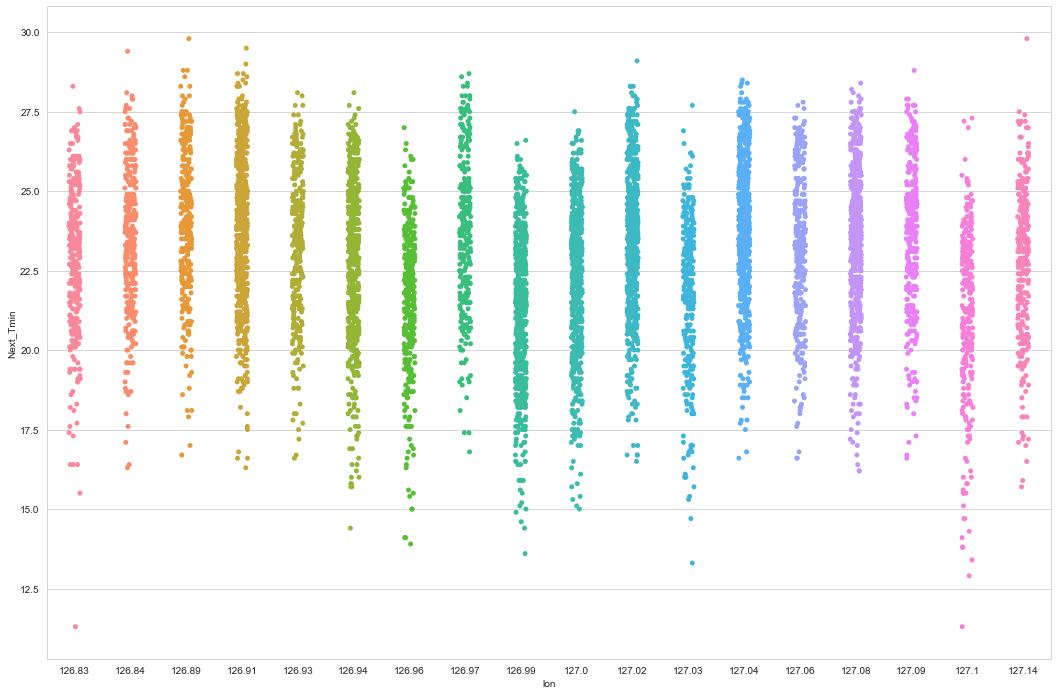

In [43]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='lon',y='Next_Tmin',data=df)

Observations :-
    
1. The next-day minimum air temperature is highest for 126.89 Â° and 127.14 Â° longitudes.
2. The next-day minimum air temperature is lowest for 126.99 Â° longitudes.
3. The next-day minimum air temperatures are also high for 126.84 Â°, 126.91 Â° and 127.02 Â° longitudes.

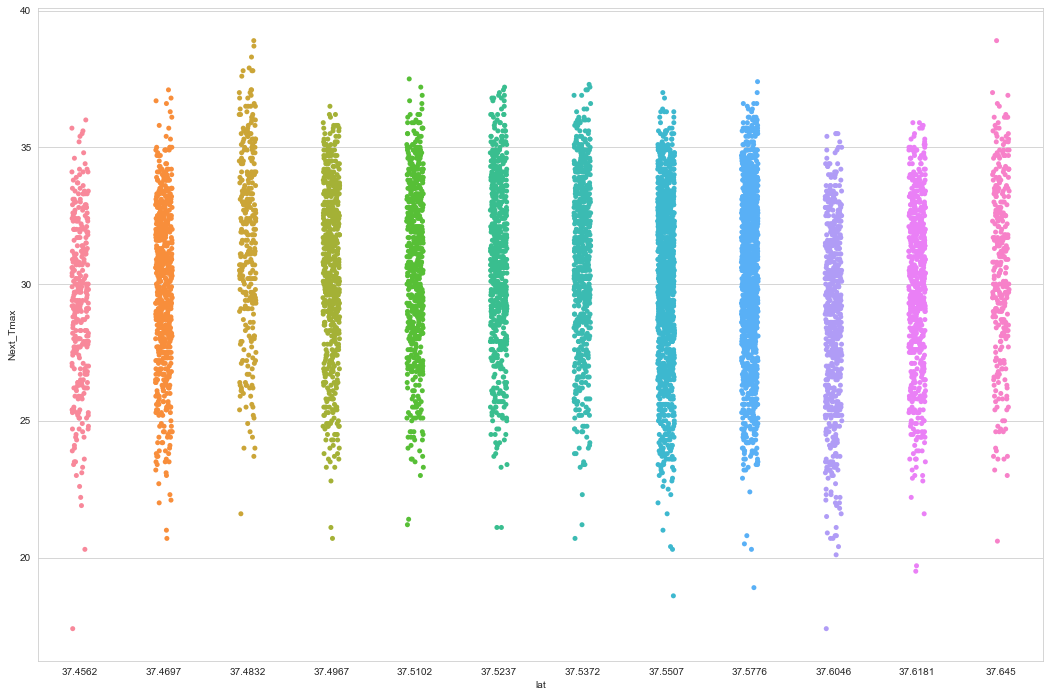

In [44]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='lat',y='Next_Tmax',data=df)

Observations :-
    
1. The next-day minimum air temperature is highest for 37.645 Â° latitudes.
2. The next-day minimum air temperature is lowest for 37.6046 Â° latitudes.
3. The next-day minimum air temperatures are also high for 37.4832 Â° latitudes.

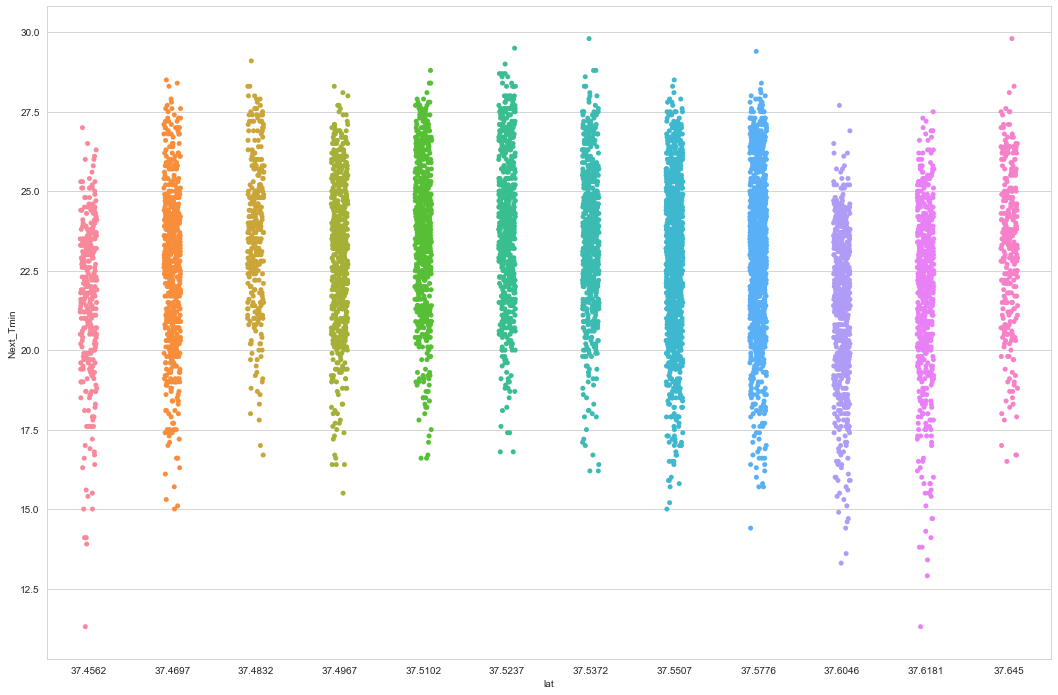

In [45]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='lat',y='Next_Tmin',data=df)

Observations :-
    
1. The next-day minimum air temperature is highest for 37.5372 Â° and 37.645 Â° latitudes.
2. The next-day minimum air temperature is lowest for 37.4562  Â° latitudes.
3. The next-day minimum air temperature are also high for 37.5237 Â°, 37.5726 Â°, 37.4832 Â° and 37.5007 Â° latitudes.

In [46]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'day', 'month', 'year'],
      dtype='object')

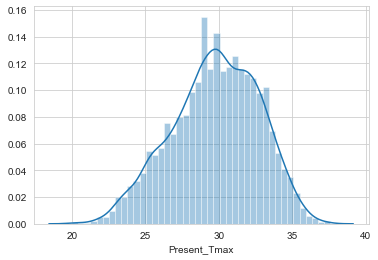

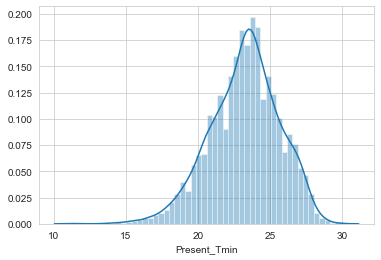

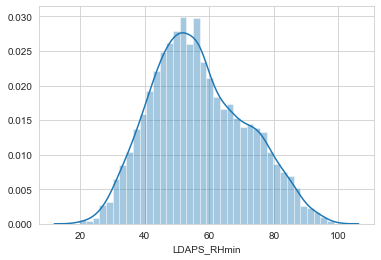

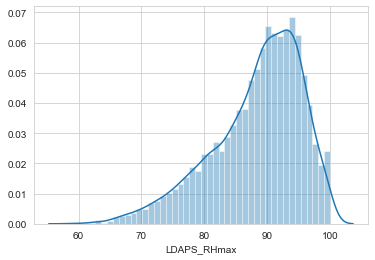

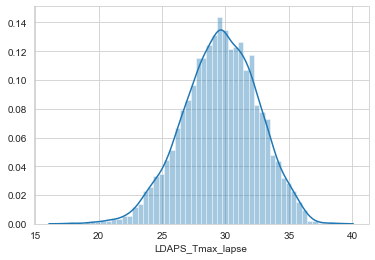

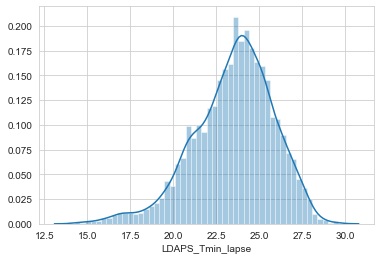

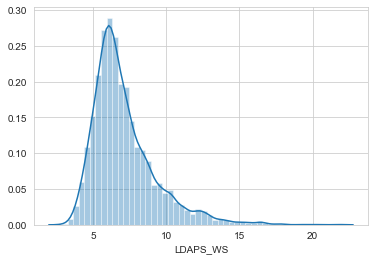

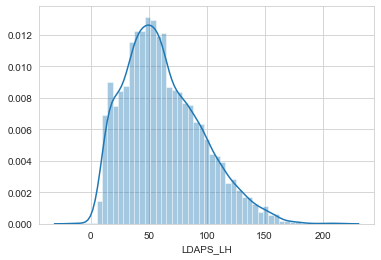

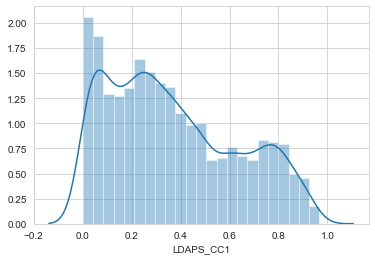

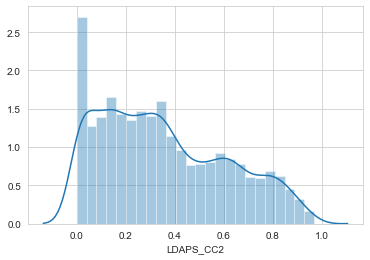

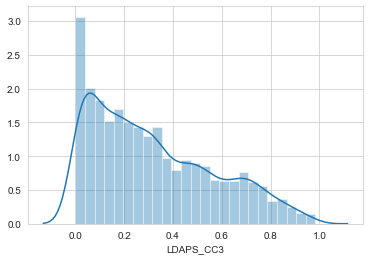

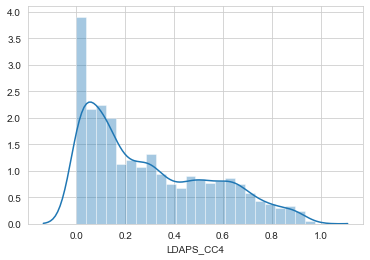

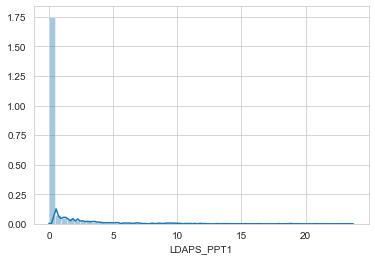

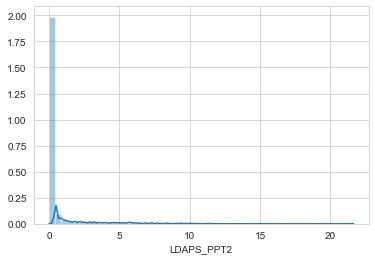

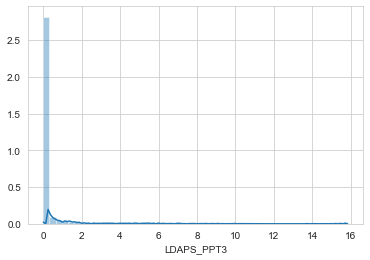

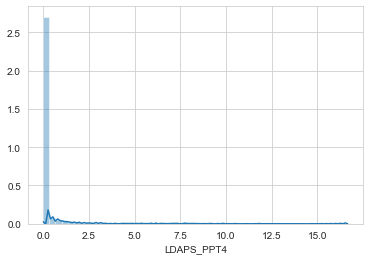

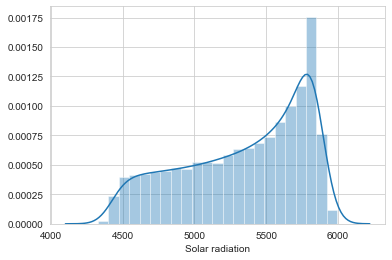

In [47]:
df_1=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4',
       'Solar radiation']

for i in df_1:
    sns.distplot(df[i])
    plt.show()

Observations :-
    
1. Maximum air temperature between 0 and 21 h on the present day (Â°C) is majorly in the range of 29 Â°C-32 Â°C.
2. Minimum air temperature between 0 and 21 h on the present day (Â°C) is majorly in the range of 22.5 Â°C-25 Â°C.
3. LDAPS model forecast of next-day minimum relative humidity (%) is majorly in the range of 40 % - 60 %.
4. LDAPS model forecast of next-day maximum relative humidity (%) is majorly in the range of 85 % - 95 %.
5. LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C) is majorly in the range of 
27.5 Â°C - 32.5 Â°C.
6. LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C) is majorly in the range of 
22.5 Â°C - 26.0 Â°C.
7. LDAPS model forecast of next-day average wind speed (m/s) is majorly in the range of 5.0 m/s - 7.5 m/s.
8. LDAPS model forecast of next-day average latent heat flux (W/m2) is majorly in the range of 25 W/m2 - 75 W/m2.
9. LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) is majorly in the range of 0.0 % - 0.4 %.
10. LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%) is majorly in the range of 0.0 % - 0.4 %.
11. LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%) is majorly in the range of 0.0 % - 0.2 %.
12. LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%) is majorly in the range of 0.0 % - 0.2 %.
13. LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%) is majorly in the range of 0.0 % - 0.25 %.
14. LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%) is majorly in the range of 0.0 % - 0.25 %.
15. LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%) is majorly in the range of 0.0 % - 0.25 %.
16. LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%) is majorly in the range of 0.0 % - 0.25 %.
17. Daily incoming solar radiation (wh/m2) is majorly in the range of 5500 wh/m2 - 6000 wh/m2.

# Plotting Outliers

station                AxesSubplot(0.125,0.657941;0.0731132x0.222059)
Present_Tmax        AxesSubplot(0.212736,0.657941;0.0731132x0.222059)
Present_Tmin        AxesSubplot(0.300472,0.657941;0.0731132x0.222059)
LDAPS_RHmin         AxesSubplot(0.388208,0.657941;0.0731132x0.222059)
LDAPS_RHmax         AxesSubplot(0.475943,0.657941;0.0731132x0.222059)
LDAPS_Tmax_lapse    AxesSubplot(0.563679,0.657941;0.0731132x0.222059)
LDAPS_Tmin_lapse    AxesSubplot(0.651415,0.657941;0.0731132x0.222059)
LDAPS_WS            AxesSubplot(0.739151,0.657941;0.0731132x0.222059)
LDAPS_LH            AxesSubplot(0.826887,0.657941;0.0731132x0.222059)
LDAPS_CC1              AxesSubplot(0.125,0.391471;0.0731132x0.222059)
LDAPS_CC2           AxesSubplot(0.212736,0.391471;0.0731132x0.222059)
LDAPS_CC3           AxesSubplot(0.300472,0.391471;0.0731132x0.222059)
LDAPS_CC4           AxesSubplot(0.388208,0.391471;0.0731132x0.222059)
LDAPS_PPT1          AxesSubplot(0.475943,0.391471;0.0731132x0.222059)
LDAPS_PPT2          

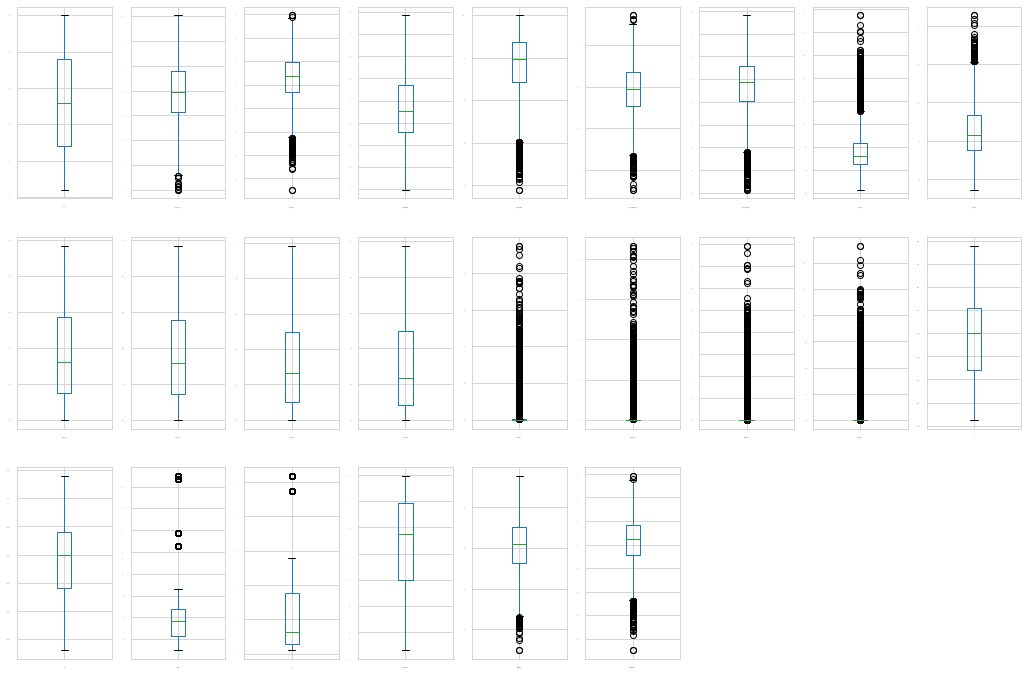

In [48]:
df.plot(kind='box',subplots=True,layout=(3,9),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. Present_Tmax, Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_PPT1 ,
LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope, Next_Tmax, Next_Tmin have outliers.

# Removing Outliers

In [49]:
df['day']=df['day'].astype('int32')
df['month']=df['month'].astype('int32')
df['year']=df['year'].astype('int32')

In [50]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
day                   int32
month                 int32
year                  int32
dtype: object

In [51]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.6643153 , 0.36172509, 0.76016871, ..., 1.57171878, 2.76761252,
        1.41366644],
       [1.52562236, 0.72067506, 0.67693727, ..., 1.57171878, 2.76761252,
        1.41366644],
       [1.38692941, 0.61920005, 0.03053001, ..., 1.57171878, 2.76761252,
        1.41366644],
       ...,
       [1.6643153 , 2.22210036, 2.42479758, ..., 1.57171878, 1.0039498 ,
        1.41439608],
       [0.        , 3.30450051, 4.96335662, ..., 1.67934124, 0.88183136,
        1.41366644],
       [0.        , 2.64870034, 2.77716765, ..., 1.67934124, 0.88183136,
        1.41366644]])

In [52]:
threshold=3
df_new=df[(z<3).all(axis=1)]

In [53]:
df_new.shape

(6894, 27)

In [54]:
df.shape

(7752, 27)

In [55]:
((7752-6894)/7752)*100

11.06811145510836

In [56]:
df=df_new

In [57]:
df.shape

(6894, 27)

# To check skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F614B4A48>,
      dtype=object)

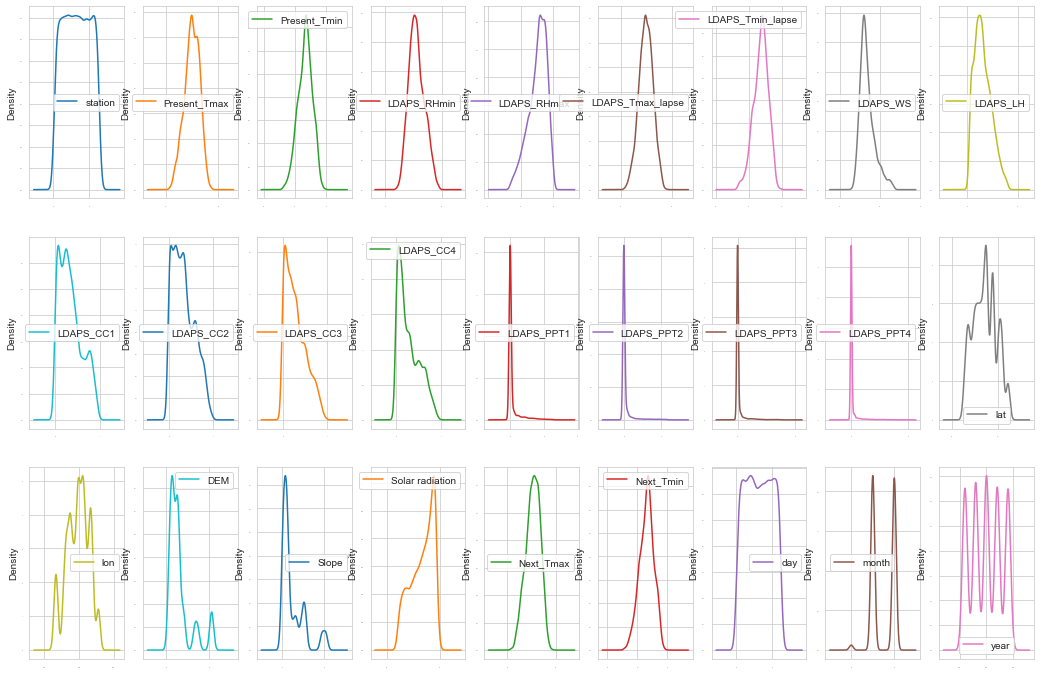

In [58]:
df.plot(kind='density',subplots=True,layout=(3,9),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. LDAPS_WS, LDAPS_LH , LDAPS_CC1, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 , LDAPS_PPT4, DEM and Slope are 
right skewed.

2. LDAPS_RHmax is left skewed.

In [59]:
df.skew()

station             0.002792
Present_Tmax       -0.273950
Present_Tmin       -0.227590
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.694148
LDAPS_Tmax_lapse   -0.110448
LDAPS_Tmin_lapse   -0.386322
LDAPS_WS            1.087781
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3           0.700217
LDAPS_CC4           0.710930
LDAPS_PPT1          3.731226
LDAPS_PPT2          4.843672
LDAPS_PPT3          5.482625
LDAPS_PPT4          5.927822
lat                 0.108251
lon                -0.240697
DEM                 1.764112
Slope               1.595059
Solar radiation    -0.505353
Next_Tmax          -0.270929
Next_Tmin          -0.238547
day                 0.001007
month              -0.192910
year                0.010998
dtype: float64

In [60]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'day', 'month', 'year'],
      dtype='object')

In [61]:
df_1_list=['LDAPS_WS','LDAPS_CC1','LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM', 'Slope']
for val in df_1_list:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [62]:
df.skew()

station             0.002792
Present_Tmax       -0.273950
Present_Tmin       -0.227590
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.694148
LDAPS_Tmax_lapse   -0.110448
LDAPS_Tmin_lapse   -0.386322
LDAPS_WS            0.734458
LDAPS_LH            0.568781
LDAPS_CC1          -0.175603
LDAPS_CC2           0.500911
LDAPS_CC3          -0.102408
LDAPS_CC4           0.002974
LDAPS_PPT1          2.396637
LDAPS_PPT2          3.025911
LDAPS_PPT3          3.255691
LDAPS_PPT4          3.589191
lat                 0.108251
lon                -0.240697
DEM                 1.173690
Slope               0.885400
Solar radiation    -0.505353
Next_Tmax          -0.270929
Next_Tmin          -0.238547
day                 0.001007
month              -0.192910
year                0.010998
dtype: float64

In [63]:

df_1_list=['LDAPS_WS','DEM','Slope']
for val in df_1_list:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [64]:
df.skew()

station             0.002792
Present_Tmax       -0.273950
Present_Tmin       -0.227590
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.694148
LDAPS_Tmax_lapse   -0.110448
LDAPS_Tmin_lapse   -0.386322
LDAPS_WS            0.557215
LDAPS_LH            0.568781
LDAPS_CC1          -0.175603
LDAPS_CC2           0.500911
LDAPS_CC3          -0.102408
LDAPS_CC4           0.002974
LDAPS_PPT1          2.396637
LDAPS_PPT2          3.025911
LDAPS_PPT3          3.255691
LDAPS_PPT4          3.589191
lat                 0.108251
lon                -0.240697
DEM                 0.809495
Slope               0.490577
Solar radiation    -0.505353
Next_Tmax          -0.270929
Next_Tmin          -0.238547
day                 0.001007
month              -0.192910
year                0.010998
dtype: float64

In [65]:
df_1_list=['LDAPS_WS','DEM']
for val in df_1_list:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [66]:
df.skew()

station             0.002792
Present_Tmax       -0.273950
Present_Tmin       -0.227590
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.694148
LDAPS_Tmax_lapse   -0.110448
LDAPS_Tmin_lapse   -0.386322
LDAPS_WS            0.468209
LDAPS_LH            0.568781
LDAPS_CC1          -0.175603
LDAPS_CC2           0.500911
LDAPS_CC3          -0.102408
LDAPS_CC4           0.002974
LDAPS_PPT1          2.396637
LDAPS_PPT2          3.025911
LDAPS_PPT3          3.255691
LDAPS_PPT4          3.589191
lat                 0.108251
lon                -0.240697
DEM                 0.615331
Slope               0.490577
Solar radiation    -0.505353
Next_Tmax          -0.270929
Next_Tmin          -0.238547
day                 0.001007
month              -0.192910
year                0.010998
dtype: float64

In [67]:
df_1_list=['DEM']
for val in df_1_list:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [68]:
df.skew()

station             0.002792
Present_Tmax       -0.273950
Present_Tmin       -0.227590
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.694148
LDAPS_Tmax_lapse   -0.110448
LDAPS_Tmin_lapse   -0.386322
LDAPS_WS            0.468209
LDAPS_LH            0.568781
LDAPS_CC1          -0.175603
LDAPS_CC2           0.500911
LDAPS_CC3          -0.102408
LDAPS_CC4           0.002974
LDAPS_PPT1          2.396637
LDAPS_PPT2          3.025911
LDAPS_PPT3          3.255691
LDAPS_PPT4          3.589191
lat                 0.108251
lon                -0.240697
DEM                 0.516349
Slope               0.490577
Solar radiation    -0.505353
Next_Tmax          -0.270929
Next_Tmin          -0.238547
day                 0.001007
month              -0.192910
year                0.010998
dtype: float64

In [69]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
day                 0
month               0
year                0
dtype: int64

In [70]:
df.drop(['LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4'],axis=1,inplace=True)

# Train Test Split

In [71]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'lat', 'lon', 'DEM',
       'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'day', 'month',
       'year'],
      dtype='object')

In [72]:
x=df[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'lat', 'lon', 'DEM',
       'Slope', 'Solar radiation', 'day', 'month',
       'year']]


In [73]:
y=df[['Next_Tmax', 'Next_Tmin']]

# Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [75]:
x=pd.DataFrame(x)

In [76]:
x.columns=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'lat', 'lon', 'DEM',
       'Slope', 'Solar radiation', 'day', 'month',
       'year']

# Algorithms

In [77]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    r2score=r2_score(y_test,pred)
    print(r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Mean squared error:',mean_squared_error(y_test,pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    if r2score>maxAccu:
        maxAccu=r2score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

0.7904014653819368
error:
Mean absolute error: 0.9504116734233753
Mean squared error: 1.5811507557184268
Root Mean squared error: 1.257438171727909
0.7584302793959012
error:
Mean absolute error: 0.9801554889462644
Mean squared error: 1.7363230601696913
Root Mean squared error: 1.3176961182949927
0.7731849045646795
error:
Mean absolute error: 0.9848861221393259
Mean squared error: 1.7258349692281032
Root Mean squared error: 1.3137103825532106
0.7575216700904234
error:
Mean absolute error: 0.9796721481919081
Mean squared error: 1.7129951771139453
Root Mean squared error: 1.3088144166053282
0.7830753289351658
error:
Mean absolute error: 0.9540304164145041
Mean squared error: 1.6137425705554205
Root Mean squared error: 1.2703316773801323
0.7651726005748347
error:
Mean absolute error: 0.9702284709414001
Mean squared error: 1.6677779947829818
Root Mean squared error: 1.2914247925384512
0.7736857333178027
error:
Mean absolute error: 0.9638489626279627
Mean squared error: 1.6425853791871194
Ro

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=112)
lm=LinearRegression()
lm.fit(x_train,y_train)
predlm=lm.predict(x_test)
r2score=r2_score(y_test,predlm)
print(r2_score(y_test,predlm))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predlm))
mean_squared_error_lm=mean_squared_error(y_test,predlm)
print('Mean squared error:',mean_squared_error_lm)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


0.7982056568047877
error:
Mean absolute error: 0.9184177925364461
Mean squared error: 1.478892585048688
Root Mean squared error: 3.5633970250010174


In [79]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2score=r2_score(y_test,preddtr)
print(r2_score(y_test,preddtr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtr))
mean_squared_error_dtr=mean_squared_error(y_test,preddtr)
print('Mean squared error:',mean_squared_error_dtr)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))

0.753455674862658
error:
Mean absolute error: 0.9723467369808831
Mean squared error: 1.7775313117996037
Root Mean squared error: 1.333240905387921


In [80]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predknn=knn.predict(x_test)
r2score=r2_score(y_test,predknn)
print(r2_score(y_test,predknn))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
mean_squared_error_knn=mean_squared_error(y_test,predknn)
print('Mean squared error:',mean_squared_error_knn)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predknn)))

0.8495294220316574
error:
Mean absolute error: 0.7787343441001969
Mean squared error: 1.077294660514174
Root Mean squared error: 1.0379280613386335


In [81]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [82]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred=ls.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
mean_squared_error_ls=mean_squared_error(y_test,pred)
print('Mean squared error:',mean_squared_error_ls)
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.7982118191705716
error:
Mean absolute error: 0.91840078670511
Mean squared error: 1.478842239121433
Mean squared error: 1.478842239121433
Root Mean squared error: 1.2160765761749681


In [83]:
rd=Ridge(alpha=.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
predrd=rd.predict(x_test)
r2score=r2_score(y_test,predrd)
print(r2_score(y_test,predrd))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrd))
mean_squared_error_rd=mean_squared_error(y_test,predrd)
print('Mean squared error:',mean_squared_error_rd)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrd)))

0.7982056568075977
error:
Mean absolute error: 0.91841779158055
Mean squared error: 1.4788925849878027
Root Mean squared error: 1.2160972761205424


In [84]:
el=ElasticNet(alpha=.0001)
el.fit(x_train,y_train)
el.score(x_train,y_train)
predel=el.predict(x_test)
r2score=r2_score(y_test,predel)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predel))
mean_squared_error_el=mean_squared_error(y_test,predel)
print('Mean squared error:',mean_squared_error_el)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predel)))

0.7982118191705716
error:
Mean absolute error: 0.9184072134210582
Mean squared error: 1.478867846842388
Root Mean squared error: 1.2160871049568727


In [85]:
# Ensembler Techniques

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2score=r2_score(y_test,predrf)
print(r2_score(y_test,predrf))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
mean_squared_error_rf=mean_squared_error(y_test,predrf)
print('Mean squared error:',mean_squared_error_rf)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

0.8962633407686069
error:
Mean absolute error: 0.6496301911667763
Mean squared error: 0.7357058160843768
Root Mean squared error: 0.8577329514973625


Random Forest Regressor and K- Neighbors Regressor are two best algorithms.

# Cross Validation Score

In [86]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())


[0.6500271  0.63957865 0.70922708 0.77338249 0.70455704]
0.6953544738926024 0.04802295573927467


In [87]:
from sklearn.model_selection import cross_val_score
knnscores=cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())


[0.53202701 0.37559201 0.53941343 0.63088398 0.62320444]
0.5402241733180247 0.09195273266900887


In [91]:
list1=[0.8962633407686069,0.8495294220316574]
list2=[0.6953544738926024,0.5402241733180247]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)

[0.2009088668760045, 0.30930524871363263]


As the difference between accuracy scores and cross validation scores of Random Forest Regressor is only 0.2%. So, It is 
verified that Random Forest Classifier is the best algorithm for this model with accuracy of 89.62 %.

# Hyper Parameter Tuning

In [88]:
rf=RandomForestRegressor()
grid_param={
 'max_depth': [ 100, 200,300],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4]}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [100, 200, 300],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4]},
             scoring='accuracy')

In [89]:
gd_sr.best_params_

{'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 1}

In [96]:
rf=RandomForestRegressor(max_depth= 100, max_features='auto', min_samples_leaf= 1)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2score=r2_score(y_test,predrf)
print(r2_score(y_test,predrf))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
mean_squared_error_rf=mean_squared_error(y_test,predrf)
print('Mean squared error:',mean_squared_error_rf)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

0.8975162539291625
error:
Mean absolute error: 0.6460758075148317
Mean squared error: 0.726705148978247
Root Mean squared error: 0.8524700281993772


Accuracy of Random Forest Regressor has changed from 89.62 %  to 89.75 % with hyper parameter tuning.

# Saving the model

In [97]:
import joblib

In [98]:
joblib.dump(rf,"rf_temp_pred.obj")

['rf_temp_pred.obj']